# Notebook for fitting of generative model of network with two groups

In [5]:
import sys,os
sys.path.append("src/")
from Model import *
from Statistics import *
from netgraph import Graph
import matplotlib.pyplot as plt

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

## Swap Only 
We choose $P^S = 1$ so that only swap games can be selected.

### Assortative structure

In [24]:
# Initialize network
##Group 1(Red) - 0
p0 = [0.99,0.9,0.5,0.2,1] # A/D
##Group 2(Blue) - 1
p1 = [0.99,0.9,0.5,0.1,1] # A/D
a = 2/3
c = a/(1-a)
N = 100 #number of nodes
g = initialization(N,z = 10,p0 = p0,p1 = p1,a = a)
g1 = g.copy()

In [25]:
#network evolution
I = 10000 #number of times of complete evolution circles
#(i.e. one complete circle is where each node is expected to be selection once)
community = {}
for n in g.nodes():
    community[n] = str(g.nodes[n]['attribute'])
N0 = [v for v in community.values()].count('0')
N1 = [v for v in community.values()].count('1')
density = {'00':[],'10':[],'01':[],'11':[]}
for i in range(I):
    g2 = dynamics(g,N=N)
    g3 = g2.copy()
#     density.append(get_density(g3,community,spar = {'0': 0, '1': 1}))
#     ax = sns.heatmap(d,fmt = '',ax = axs[i], cmap="YlGnBu")
    den = get_density(g3,community)
    density['00'].append(den[0][0])
    density['10'].append(den[1][0])
    density['01'].append(den[0][1])
    density['11'].append(den[1][1])

Text(0.5, 1.0, 'A and D')

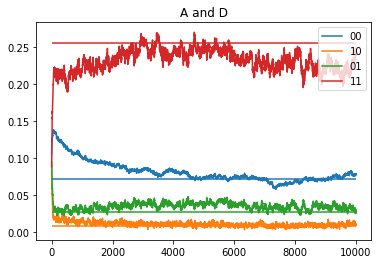

In [26]:
#Compare simulation results with analytical solution
z0 = 1/0.2 #analytical value
z1 = 1/0.1 #analytical value
pp0 = p0[1]/(p0[1]+(1-p0[1])/c)
pp1 = p1[1]/(p1[1]+(1-p1[1])*c)
plt.plot(range(0,I),density['00'],label ='00')
plt.plot(range(0,I),density['10'],label ='10')
plt.plot(range(0,I),density['01'],label ='01')
plt.plot(range(0,I),density['11'],label ='11')
plt.hlines(z0*pp0/(N0-1),0,I,color = colors[0])
plt.hlines(z0*(1-pp0)/(N1),0,I,color = colors[1])
plt.hlines(z1*pp1/(N1-1),0,I,color = colors[3])
plt.hlines(z1*(1-pp1)/(N0),0,I,color = colors[2])
plt.legend(loc="upper right")
plt.title("A and D")

## Change Only 
We choose $P^S = 0$ so that only swap games can be selected.

In [27]:
# Initialize network
##Group 1(Red) - 0
p0 = [0,0,0.5,0.1,1] 
##Group 2(Blue) - 1
p1 = [0,0,0.5,0.3,1] 
a = 2/3
c = a/(1-a)
N = 100 #number of nodes
g = initialization(N,z = 10,p0 = p0,p1 = p1)
g1 = g.copy()

## Swap and Change

In [ ]:
# Initialize network
##Group 1(Red) - 0
p0 = [0.7,0.9,0.5,0.2,1] 
##Group 2(Blue) - 1
p1 = [0.5,0.8,0.5,0.1,1] 
a = 2/3
c = a/(1-a)
N = 100 #number of nodes
g = initialization(N,z = 10,p0 = p0,p1 = p1,a = a)
g1 = g.copy()